<a href="https://colab.research.google.com/github/amomen1218/Earth-Data-Analytics/blob/main/subset_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install earthpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 71.3 MB/s eta 0:00:00


In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [18]:
temp = pd.read_csv('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/precipitation/805325-precip-dailysum-2003-2013.csv',
                   parse_dates=['DATE'],
                   index_col=['DATE'],
                   na_values=['9999.9'])
temp.head() #for seeing first 5 rows

<ipython-input-18-27e64dcfcac2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  temp = pd.read_csv('/content/drive/MyDrive/Earth data Analytics/earth-analytics/data/precipitation/805325-precip-dailysum-2003-2013.csv',


,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-01-05,999.99,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,5
2003-02-01,0.00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-02-02,999.99,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,33
2003-02-03,0.40,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,34


In [19]:
temp.tail() #for seeing last 5 rows

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-12-04,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,338
2013-12-22,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,356
2013-12-23,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,357
2013-12-29,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,363
2013-12-31,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,365


In [20]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 792 entries, 2003-01-01 to 2013-12-31
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DAILY_PRECIP  792 non-null    float64
 1   STATION       792 non-null    object 
 2   STATION_NAME  792 non-null    object 
 3   ELEVATION     792 non-null    float64
 4   LATITUDE      792 non-null    float64
 5   LONGITUDE     792 non-null    float64
 6   YEAR          792 non-null    int64  
 7   JULIAN        792 non-null    int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 55.7+ KB


In [23]:
temp.describe()

,DAILY_PRECIP,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
count,792.000000,792.0,792.000000,792.000000,792.000000,792.000000
mean,5.297045,1650.5,40.033850,-105.281106,2007.967172,175.541667
std,70.915223,0.0,0.000045,0.000005,3.149287,98.536373
min,0.000000,1650.5,40.033800,-105.281110,2003.000000,1.000000
25%,0.100000,1650.5,40.033800,-105.281110,2005.000000,96.000000
50%,0.100000,1650.5,40.033890,-105.281110,2008.000000,167.000000
75%,0.300000,1650.5,40.033890,-105.281100,2011.000000,255.250000
max,999.990000,1650.5,40.033890,-105.281100,2013.000000,365.000000


In [24]:
temp.index

DatetimeIndex(['2003-01-01', '2003-01-05', '2003-02-01', '2003-02-02',
               '2003-02-03', '2003-02-05', '2003-02-06', '2003-02-07',
               '2003-02-10', '2003-02-18',
               ...
               '2013-11-01', '2013-11-09', '2013-11-21', '2013-11-27',
               '2013-12-01', '2013-12-04', '2013-12-22', '2013-12-23',
               '2013-12-29', '2013-12-31'],
              dtype='datetime64[ns]', name='DATE', length=792, freq=None)

In [29]:
temp['2013-01-01':'2013-12-31'].head() # Slices the data for the year 2012 and shows the first 5 rows.

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,1
2013-01-28,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,28
2013-01-29,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,29
2013-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,32
2013-02-14,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,45


In [36]:
# Select all December data - view first few rows
temp[temp.index.month == 12].head()
temp[temp.index.month == 12].tail() #view last 5 rows

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-12-04,0.4,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,338
2013-12-22,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,356
2013-12-23,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,357
2013-12-29,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,363
2013-12-31,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,365


In [38]:
temp[temp.index.year == 2013].head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2013-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,1
2013-01-28,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,28
2013-01-29,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,29
2013-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,32
2013-02-14,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,2013,45


In [41]:
temp[temp.index.day == 1].head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2003-01-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,1
2003-02-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,32
2003-03-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,60
2003-04-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,91
2003-05-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2003,121


In [42]:
# Subset data to May-Aug 2005
temp_2005 = temp['2005-05-01':'2005-08-31']

temp_2005.head()

,DAILY_PRECIP,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,YEAR,JULIAN
DATE,,,,,,,,
2005-05-01,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,121
2005-05-11,1.2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,131
2005-05-30,0.5,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,150
2005-05-31,0.1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,151
2005-06-01,0.0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,2005,152


In [43]:
# Check min value of index
print(temp_2005.index.min())

# Check max value of index
print(temp_2005.index.max())

2005-05-01 00:00:00
2005-08-23 00:00:00


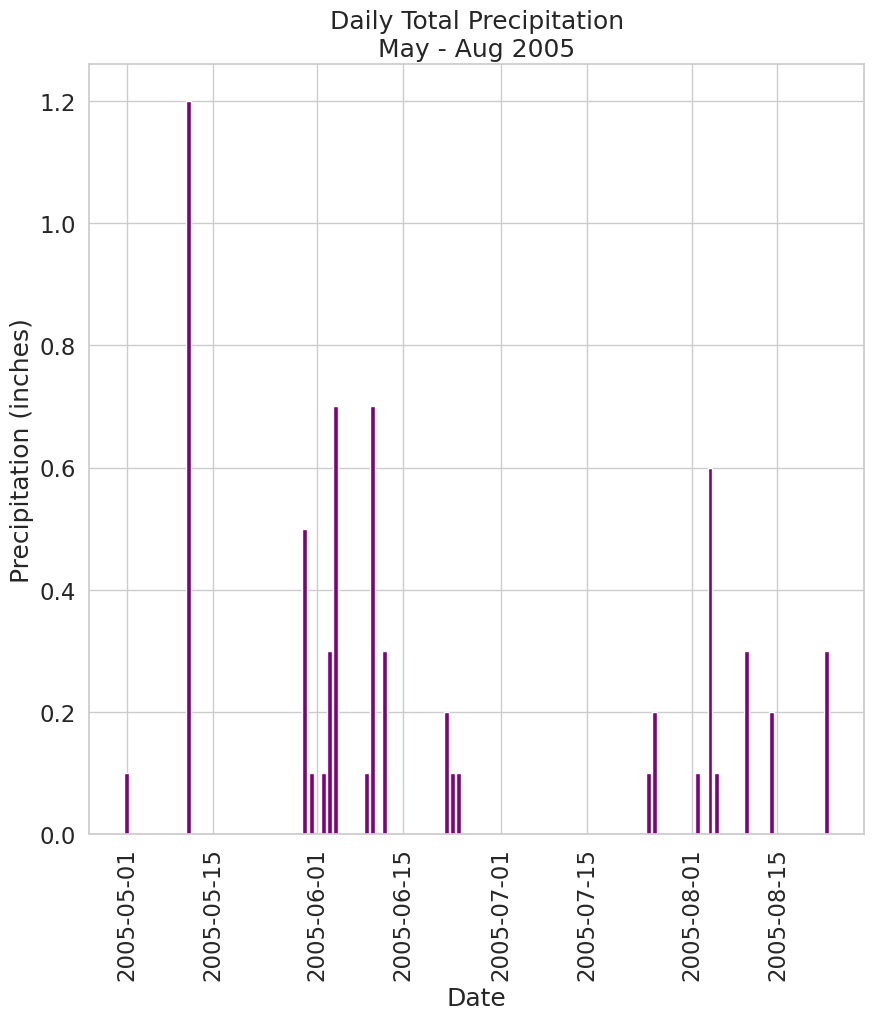

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(temp_2005.index.values,
       temp_2005['DAILY_PRECIP'],
       color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Total Precipitation\nMay - Aug 2005")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=90)

plt.show()